#Capstone Project

M208X0419 - Supriadi

M330X0882 - Albert Ewaldo Arthur Daeli

M116Y0159 - Herliana Nur Ekawati

M248Y0539 - Sawitri Fina Kartika


#Data Understanding

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
emiten = pd.read_csv("Ringkasan Saham v2.csv")

In [40]:
emiten.shape

(810, 15)

In [61]:
emiten.head()

,No,Kode,NamaPerusahaan,papanPencatatan,Sektor,numSelisih,numPenutupan,numGainers,Gainers,numVolume,Volume,numNilai,Nilai,numFreq,Freq
0,1,AALI,Astra Agro Lestari Tbk.,Utama,Noncyc,-75,8625,-0.86%,gainersRendah,2154300,volumeRendah,18553022500,nilaiSedang nilaiRendah,1487,freqRendah
1,2,ABBA,Mahaka Media Tbk.,Pengembangan,Cyclic,-1,183,-0.54%,gainersRendah,11412300,volumeRendah,2091509500,nilaiRendah,1071,freqRendah
2,3,ABDA,Asuransi Bina Dana Arta Tbk.,Pengembangan,Financials,0,6600,0.00%,gainersRendah,0,volumeRendah,0,nilaiRendah,0,freqRendah
3,4,ABMM,ABM Investama Tbk.,Utama,Industrials,-160,3620,-4.23%,gainersRendah,7397700,volumeRendah,26986932000,nilaiSedang nilaiRendah,2480,freqRendah
4,5,ACES,Ace Hardware Indonesia Tbk.,Utama,Cyclic,10,590,1.72%,gainersRendah,85946300,volumeSedang volumeRendah,49649998500,nilaiSedang nilaiRendah,5358,freqSedang freqRendah


#Univariate Exploratory Data Analysis

---



In [42]:
emiten.isna().sum()

No                 0
Kode               0
NamaPerusahaan     0
papanPencatatan    0
Sektor             0
numSelisih         0
numPenutupan       0
numGainers         0
Gainers            0
numVolume          0
Volume             0
numNilai           0
Nilai              0
numFreq            0
Freq               0
dtype: int64

In [43]:
emiten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No               810 non-null    int64 
 1   Kode             810 non-null    object
 2   NamaPerusahaan   810 non-null    object
 3   papanPencatatan  810 non-null    object
 4   Sektor           810 non-null    object
 5   numSelisih       810 non-null    int64 
 6   numPenutupan     810 non-null    int64 
 7   numGainers       810 non-null    object
 8   Gainers          810 non-null    object
 9   numVolume        810 non-null    int64 
 10  Volume           810 non-null    object
 11  numNilai         810 non-null    int64 
 12  Nilai            810 non-null    object
 13  numFreq          810 non-null    int64 
 14  Freq             810 non-null    object
dtypes: int64(6), object(9)
memory usage: 95.0+ KB


In [ ]:
emiten.describe()

,No,numSelisih,numPenutupan,numVolume,numNilai,numFreq
count,810.000000,810.000000,810.000000,8.100000e+02,8.100000e+02,810.000000
mean,405.500000,-1.446914,1518.087654,2.229148e+07,1.276691e+10,1416.033333
std,233.971152,53.204043,4601.563293,1.459060e+08,5.168299e+10,3836.394392
min,1.000000,-625.000000,29.000000,0.000000e+00,0.000000e+00,0.000000
25%,203.250000,-4.000000,119.250000,1.160000e+04,4.883375e+06,14.000000
50%,405.500000,0.000000,306.000000,8.310500e+05,2.520646e+08,170.000000
75%,607.750000,1.000000,1065.000000,7.861375e+06,2.754140e+09,984.000000
max,810.000000,575.000000,72900.000000,3.632316e+09,6.928097e+11,50087.000000


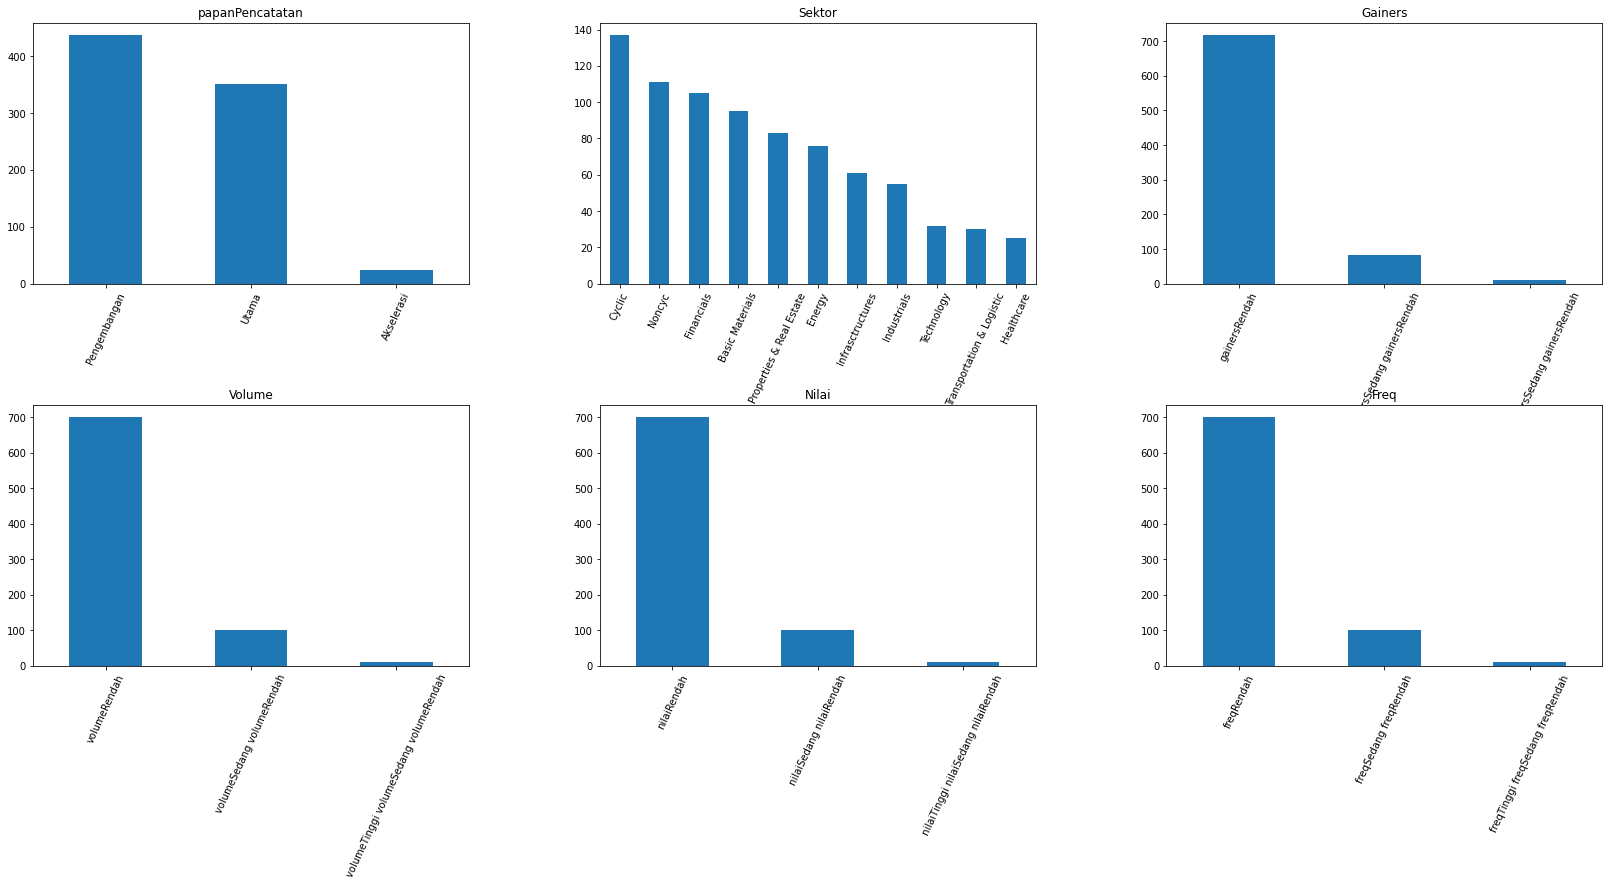

In [44]:
import matplotlib.pyplot as plt

categorical_features =["papanPencatatan","Sektor", "Gainers","Volume","Nilai","Freq"]
fig, axes = plt.subplots(2, 3, figsize = (25,12))
fig.tight_layout(pad=10.0)
arrCount = []

for cat in categorical_features:
  arrCount.append(emiten[cat].value_counts())

arrCount[0].plot(kind='bar',ax=axes[0][0], title=categorical_features[0])
arrCount[1].plot(kind='bar',ax=axes[0][1], title=categorical_features[1])
arrCount[2].plot(kind='bar',ax=axes[0][2], title=categorical_features[2])
arrCount[3].plot(kind='bar',ax=axes[1][0], title=categorical_features[3])
arrCount[4].plot(kind='bar',ax=axes[1][1], title=categorical_features[4])
arrCount[5].plot(kind='bar',ax=axes[1][2], title=categorical_features[5])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=65)

#Data Preparation

---



In [45]:
def important_features(emiten):
    dfemiten = emiten.copy()
    for i in range(0, emiten.shape[0]):
        dfemiten["fitur"]=dfemiten["papanPencatatan"]+' '+dfemiten["Sektor"]+" "+dfemiten["Gainers"]+" "+dfemiten["Volume"]+" "+dfemiten["Nilai"]+" "+dfemiten["Freq"]
    return dfemiten

In [46]:
dfemiten=important_features(emiten)


In [47]:
dfemiten["item"]=[i for i in range(0,dfemiten.shape[0])]

# Model Development

---



### TF-IDF Vectorizer

In [48]:
tfi=TfidfVectorizer()

In [49]:
tfidf=tfi.fit_transform(dfemiten["fitur"].apply(lambda x: np.str_(x)))

### Cosine Similarity

In [50]:
cos=cosine_similarity(tfidf)

In [52]:
def recommend(title):
    recEmiten=dfemiten[dfemiten.NamaPerusahaan==title]["item"].values[0]
    rating=list(enumerate(cos[recEmiten]))
    recRating=sorted(rating,key=lambda x:x[1],reverse=True)
    racReting=recRating[1:]
    emiten=[dfemiten[emiten[0]==dfemiten["item"]]["NamaPerusahaan"].values[0] for emiten in recRating]
    return emiten

In [53]:
def recommend_ten(nEmiten):
    rec10=[]
    count=0
    for recom in nEmiten:
        if count > 10:
            break
        count+=1
        rec10.append(recom)
    return rec10

### Uji Rekomendasi

In [65]:
recom=recommend("Bank Central Asia Tbk.")
rekomendasi=recommend_ten(recom)
rekomendasi

['Bank Central Asia Tbk.',
 'Bank Rakyat Indonesia (Persero) Tbk.',
 'Bank Mandiri (Persero) Tbk.',
 'Adaro Energy Indonesia Tbk.',
 'Astra International Tbk.',
 'Bank Raya Indonesia Tbk.',
 'Bank Mayapada Internasional Tbk.',
 'Bank Panin Dubai Syariah Tbk.',
 'Paninvest Tbk.',
 'Panin Financial Tbk.',
 'Telkom Indonesia (Persero) Tbk.']